Code for generating some of the figures in the paper. Most data points were copied here from the presentation.

In [1]:
import networkx as nx
import numpy as np
import scipy
import random
import matplotlib.pyplot as plt

from basic import generate_erdos_renyi_graph, perturb_graph

(1100.0, 1500.0)

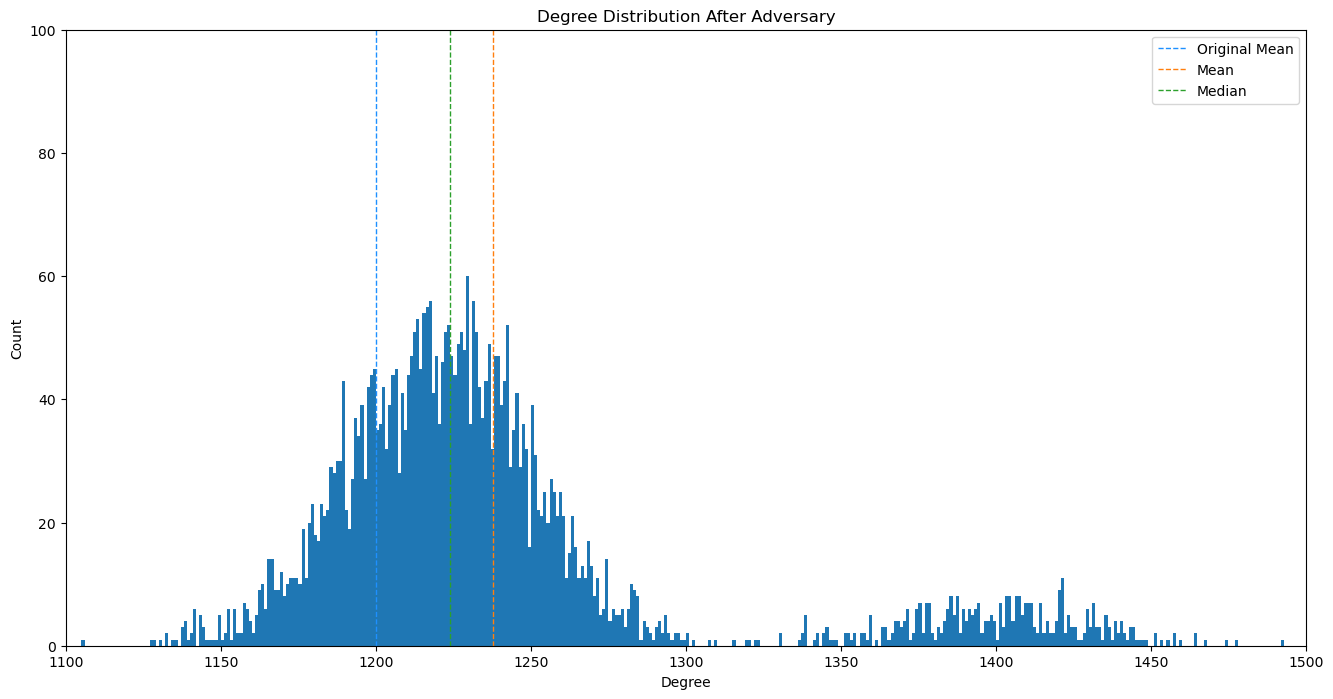

In [24]:
n = 4000
G = generate_erdos_renyi_graph(n, 0.3)

get_degree_list = lambda G: list((d for _, d in G.degree()))

degrees = get_degree_list(G)
p = np.mean(degrees) / (n - 1)
# print(f"Mean:\t{p}")
# var = np.var(degrees)
# print(f"Variance:\t{var}")
# print()

# plt.figure(figsize=(8, 6))
# plt.hist(get_degree_list(G), bins=range(n+1))
# plt.title("Degree Distribution")
# plt.xlabel("Degree")
# plt.ylabel("Count")
# plt.show()

perturbed_G = perturb_graph(G, 0.1, 0.35)
perturbed_G_degrees = get_degree_list(perturbed_G)

plt.figure(figsize=(16, 8))
plt.hist(perturbed_G_degrees, bins=range(n+1))
plt.title("Degree Distribution After Adversary")
plt.xlabel("Degree")
plt.ylabel("Count")

# label the orgional p value and the mean and median
plt.axvline(p * (n - 1), color='dodgerblue', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(perturbed_G_degrees), color='tab:orange', linestyle='dashed', linewidth=1)
plt.axvline(np.median(perturbed_G_degrees), color='tab:green', linestyle='dashed', linewidth=1)

plt.legend(["Original Mean", "Mean", "Median"])

# shrink the y-axis to make the plot more readable
plt.ylim(0, n//40)
plt.xlim(1100, 1500)

In [26]:
# # VARIANCE VS MEDIAN - MEAN epsilon = 0.05
# y_variance = [1.2554434966514983e-06, 2.038480845160842e-07, 1.8034109698462092e-07, 8.996776243674138e-08, 8.119998876141792e-08, 6.876476904136584e-08, 2.462705643357402e-08, 2.4550659923504554e-08]
# y_our = [5.508779699736719e-05, 2.3661637563694767e-05, 1.2679046024079825e-05, 9.972736235080763e-06, 6.417990775801235e-06, 4.993927464438671e-06, 3.287110940417637e-06, 3.5081739493561773e-06]

In [36]:
from algos import mean_adjust_median_improved
y_mam_bias_removal = []
y_mam_bias_detailed = {}

x = np.arange(200, 5400, 200)
trials = 10

for n in x:
    error = 0
    y_mam_bias_detailed[n] = []
    for _ in range(trials):
        G = generate_erdos_renyi_graph(n, 0.3)
        degrees = get_degree_list(G)
        p = np.mean(degrees) / (n - 1)
        Gp = perturb_graph(G, 0.1, 0.35)
        trial_error = (p - mean_adjust_median_improved(Gp, 0.1)) ** 2
        y_mam_bias_detailed[n].append(trial_error)
        error += trial_error
    y_mam_bias_removal.append(error / trials)
    print(n, y_mam_bias_removal[-1])


200 0.00014201181248706818
400 1.10041373557478e-05
600 2.472833778634816e-06
800 1.8460257631296697e-06
1000 9.325005463284786e-07
1200 9.85420961483971e-07
1400 2.967995574539272e-07
1600 6.000503556757453e-07
1800 2.0969093288331165e-07
2000 2.538146766689286e-07
2200 2.4404971416325733e-07
2400 1.162109217791516e-07
2600 2.436381617422474e-07
2800 8.252534262002684e-08
3000 1.0351385952284516e-07
3200 9.543251600851604e-08
3400 1.4305326473592865e-07
3600 1.2383038403571603e-07
3800 1.162574793625715e-07
4000 3.0104132235027825e-08
4200 5.6952130794375617e-08
4400 4.937196029874741e-08
4600 4.354493462661783e-08
4800 3.7058499266466715e-08
5000 5.927133577494229e-08
5200 3.4247598891122614e-08


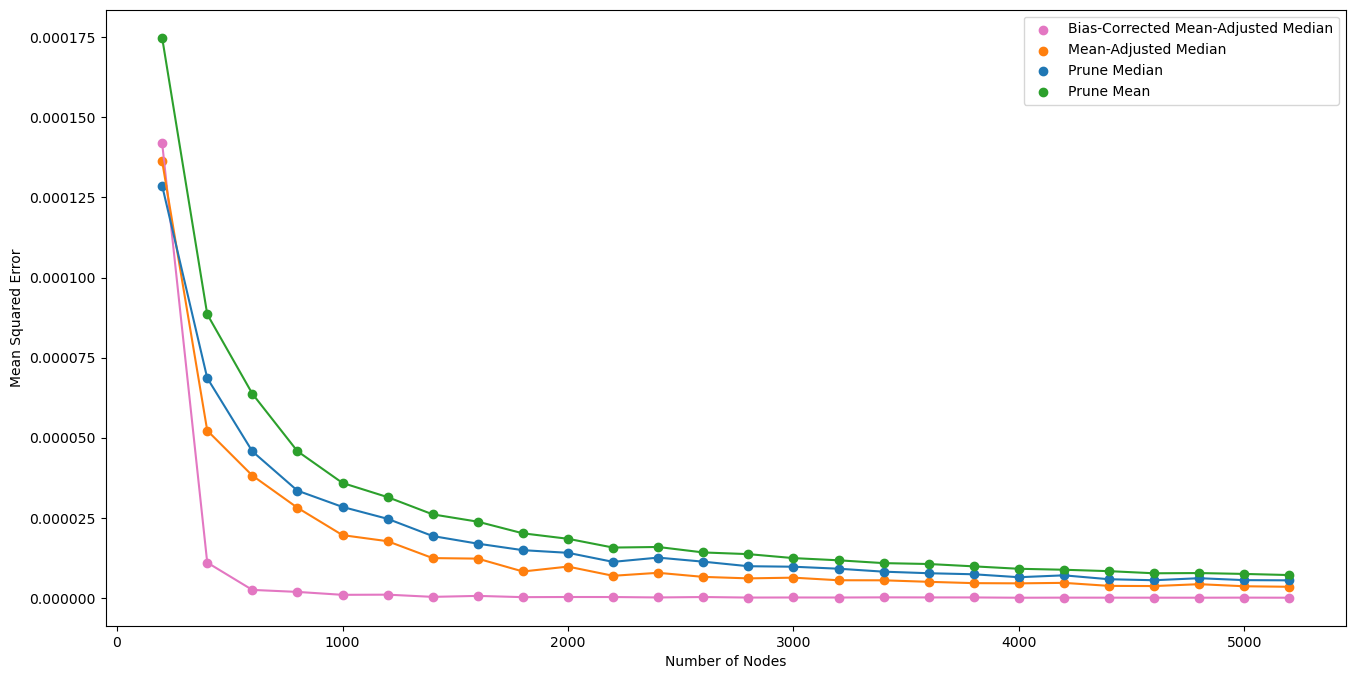

In [64]:
x = np.arange(200, 5400, 200)

y_ours = [0.00013634452160493903, 5.22333562885806e-05, 3.817706218564227e-05, 2.812766467737277e-05, 1.9572326706173113e-05, 1.76748878696082e-05, 1.2402104938914225e-05, 1.2237927555413751e-05, 8.219103646736e-06, 9.748124474691482e-06, 6.880325413539414e-06, 7.808406192099742e-06, 6.535714614615025e-06, 6.071517881325739e-06, 6.294463869897991e-06, 5.485029108400668e-06, 5.467412325664766e-06, 4.995358100634674e-06, 4.5823970720777465e-06, 4.51798755571008e-06, 4.670951434812875e-06, 3.7276702697471393e-06, 3.672025697881993e-06, 4.259919248246263e-06, 3.6084482186111942e-06, 3.447353360467727e-06]
y_mam_bias_removal = [0.00014201181248706818,  1.10041373557478e-05,  2.472833778634816e-06,  1.8460257631296697e-06,  9.325005463284786e-07,  9.85420961483971e-07,  2.967995574539272e-07,  6.000503556757453e-07,  2.0969093288331165e-07,  2.538146766689286e-07,  2.4404971416325733e-07,  1.162109217791516e-07,  2.436381617422474e-07,  8.252534262002684e-08,  1.0351385952284516e-07,  9.543251600851604e-08,  1.4305326473592865e-07,  1.2383038403571603e-07,  1.162574793625715e-07,  3.0104132235027825e-08,  5.6952130794375617e-08,  4.937196029874741e-08,  4.354493462661783e-08,  3.7058499266466715e-08,  5.927133577494229e-08,  3.4247598891122614e-08]
y_prune_mean = [0.00017488478027343724, 8.854065530395493e-05, 6.37331332284431e-05, 4.578278425788879e-05, 3.586476827812494e-05, 3.144176614153818e-05, 2.605701584910918e-05, 2.3772596067309516e-05, 2.0140059610277045e-05, 1.8434932656054556e-05, 1.569291477219347e-05, 1.5871821486108126e-05, 1.4168416195373264e-05, 1.364146579146006e-05, 1.2401174469444499e-05, 1.1715175661861927e-05, 1.083420500266204e-05, 1.0558240542909123e-05, 9.823271587118574e-06, 9.068132567065546e-06, 8.76570574365839e-06, 8.325383696498765e-06, 7.660123598806753e-06, 7.73272364756499e-06, 7.458116750594934e-06, 7.107129727498797e-06]
y_prune_median = [0.00012868656250000004, 6.862072656250018e-05, 4.573754629629634e-05, 3.346712792968756e-05, 2.8378643200000014e-05, 2.4665392746913555e-05, 1.928674224281537e-05, 1.690893313598626e-05, 1.4877689262307391e-05, 1.405158832500001e-05, 1.122772744774938e-05, 1.2554105890721332e-05, 1.1287808725184558e-05, 9.864685196272282e-06, 9.712747733333375e-06, 9.088101341247544e-06, 8.16542056264279e-06, 7.679075119551022e-06, 7.350567669926549e-06, 6.436416325000039e-06, 7.018005064761949e-06, 5.80210254379822e-06, 5.489094062342499e-06, 6.1243898865500565e-06, 5.521096190720049e-06, 5.456785125476959e-06]
y_mean = [0.0031542996250000003, 0.0031980500390625015, 0.0032564001126543208, 0.0032462693676757817, 0.0032341566691999994, 0.003250872518132715, 0.0032501909321116214, 0.003244017713653564, 0.003246066398510136, 0.0032429178501999978, 0.0032437906364490136, 0.0032451816116415887, 0.003252246729254929, 0.0032518735325515412, 0.00325424984594568, 0.0032483397919197098, 0.0032466690808120105, 0.003244493825948312, 0.003245325005850939, 0.0032475157585375005, 0.0032534192519577737, 0.0032386379004913438, 0.003247412773130099, 0.0032498636513581466, 0.003240525912001281, 0.003252002343184324]
y_median = [0.001211578750000001, 0.0010923779531250009, 0.0010770132407407402, 0.0010518694716796877, 0.0010227132432000011, 0.001021314177469135, 0.001002055328248646, 0.000998669785186767, 0.000980477959324036, 0.0009874047039500002, 0.0009721619134451202, 0.0009790987709659515, 0.0009739323552659213, 0.0009715534208467824, 0.0009739161736592601, 0.000967323874046326, 0.0009661499803402731, 0.0009632367718788107, 0.0009606739122263494, 0.0009608696257000012, 0.0009635855477167436, 0.0009523712563755048, 0.0009543768940541236, 0.0009597310070017122, 0.0009519909929907193, 0.0009542885884368107]

color4 = 'tab:purple'
color5 = 'tab:red'
color2 = "tab:green"
color3 = 'tab:blue'
color1 = "tab:orange"
color0 = "tab:pink"

plt.figure(figsize=(16, 8))

plt.scatter(x, y_mam_bias_removal, label="Bias-Corrected Mean-Adjusted Median", color=color0)
plt.scatter(x, y_ours, label="Mean-Adjusted Median", color=color1)
plt.scatter(x, y_prune_median, label="Prune Median", color=color3)
plt.scatter(x, y_prune_mean, label="Prune Mean", color=color2)
# plt.scatter(x, y_median, label="Median", color=color5)
# plt.scatter(x, y_mean, label="Mean", color=color4)
plt.plot(x, y_mam_bias_removal, color=color0)
plt.plot(x, y_ours, color=color1)
plt.plot(x, y_prune_mean, color=color2)
plt.plot(x, y_prune_median, color=color3)
# plt.plot(x, y_mean, color=color4)
# plt.plot(x, y_median, color=color5)
# plt.ylim(0, 0.00018)
plt.xlabel("Number of Nodes")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

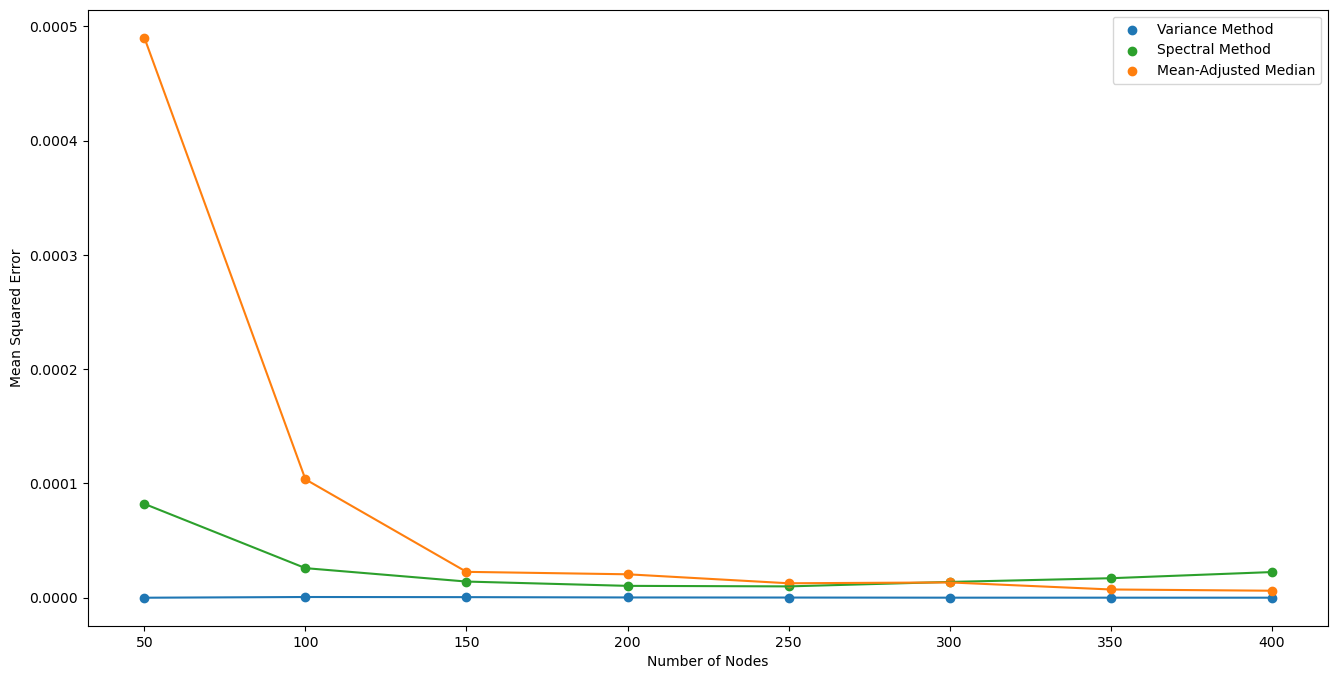

In [60]:
x = np.arange(50, 450, 50)
# SPECTRAL VS VARIANCE epsilon = 0.01
y_our = [0.0004899902057483003, 0.00010358611324579549, 2.2639060269398296e-05, 2.050205768392317e-05, 1.26452475080325e-05, 1.3392641459900294e-05, 7.22147091638668e-06, 6.1210612152008495e-06]
y_spectral = [8.211411498415548e-05, 2.588294896030261e-05, 1.4144365936194392e-05, 1.0378914718265723e-05, 9.916505680303559e-06, 1.381137220883677e-05, 1.706158603186175e-05, 2.2446770544361622e-05]
y_variance = [0.0, 6.225256496745151e-07, 5.05525165944969e-07, 2.292723480602472e-07, 1.5119237747144357e-07, 4.622612627115139e-08, 4.095789454512381e-08, 2.1013490119048633e-08]

plt.figure(figsize=(16, 8))

color1 = "tab:blue"
color2 = "tab:green"
color3 = "tab:orange"
color4 = "tab:pink"
plt.scatter(x, y_variance, label="Variance Method", color=color1)
plt.scatter(x, y_spectral, label="Spectral Method", color=color2)
plt.scatter(x, y_our, label="Mean-Adjusted Median", color=color3)
plt.plot(x, y_variance, color=color1)
plt.plot(x, y_spectral, color=color2)
plt.plot(x, y_our, color=color3)
# plt.ylim(0, 0.00018)
plt.xlabel("Number of Nodes")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()